In [1]:
import pandas as pd
import numpy as np
import os
import glob
import cv2
import PIL
from PIL import Image

%matplotlib inline
from matplotlib import pyplot as plt

In [18]:
path_img_, name_img_, cls_ = [], [], []
basepth = '/media/HDD/mini-ImageNet/mini-imagenet'
folder = ['train', 'val', 'test']
for fol in folder:
    path_calss =  f'{basepth}/{fol}'
    Class_list = os.listdir(path_calss)
    print(f"[INFO]: {fol} Set ==> len {len(Class_list)} Classes")
    for C in Class_list:
        path_img_direc = f'{path_calss}/{C}'
        img_path = glob.glob(f"{path_img_direc}/*")
        for imp in img_path:
            name_img = imp.split('/')[-1]
            name_img_.append(name_img)
            path_img_.append(imp)
            cls_.append(C)
    print("*"*125)

[INFO]: train Set ==> len 64 Classes
*****************************************************************************************************************************
[INFO]: val Set ==> len 16 Classes
*****************************************************************************************************************************
[INFO]: test Set ==> len 20 Classes
*****************************************************************************************************************************


In [19]:
print(len(path_img_), len(name_img_), len(cls_))

60000 60000 60000


In [26]:
## Create DataFrame

data = { "img_path": path_img_, "filename": name_img_, "label": cls_}
df = pd.DataFrame(data)
print(df.shape)
df.head()

(60000, 3)


,img_path,filename,label
0,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0774760700000869.jpg,n07747607
1,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0774760700000030.jpg,n07747607
2,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0774760700000978.jpg,n07747607
3,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0774760700000722.jpg,n07747607
4,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0774760700000996.jpg,n07747607


## ⚙️Define Class ==> TRUE, FALSE

- 300 TRUE/label

- 300 FALSE/label

In [38]:
TRUE_df_all, FALSE_df_all = [], []
list_label = list(set(df['label']))
print(len(list_label))
#list_label
for j in range(len(list_label)):
    print(f"[INFO]: Directory: {j+1}")
    df_label = df[df["label"]==list_label[j]]
    TRUE_df = df_label.sample(frac=0.5,random_state=200)
    TRUE_df["cls"] = "TRUE"
    TRUE_df_all.append(TRUE_df)
    print(TRUE_df.shape)
    FALSE_df = df_label.drop(TRUE_df.index)
    FALSE_df["cls"] = "FALSE"
    FALSE_df_all.append(FALSE_df)
    print(FALSE_df.shape)
    print("="*125)

100
[INFO]: Directory: 1
(300, 4)
(300, 4)
[INFO]: Directory: 2
(300, 4)
(300, 4)
[INFO]: Directory: 3
(300, 4)
(300, 4)
[INFO]: Directory: 4
(300, 4)
(300, 4)
[INFO]: Directory: 5
(300, 4)
(300, 4)
[INFO]: Directory: 6
(300, 4)
(300, 4)
[INFO]: Directory: 7
(300, 4)
(300, 4)
[INFO]: Directory: 8
(300, 4)
(300, 4)
[INFO]: Directory: 9
(300, 4)
(300, 4)
[INFO]: Directory: 10
(300, 4)
(300, 4)
[INFO]: Directory: 11
(300, 4)
(300, 4)
[INFO]: Directory: 12
(300, 4)
(300, 4)
[INFO]: Directory: 13
(300, 4)
(300, 4)
[INFO]: Directory: 14
(300, 4)
(300, 4)
[INFO]: Directory: 15
(300, 4)
(300, 4)
[INFO]: Directory: 16
(300, 4)
(300, 4)
[INFO]: Directory: 17
(300, 4)
(300, 4)
[INFO]: Directory: 18
(300, 4)
(300, 4)
[INFO]: Directory: 19
(300, 4)
(300, 4)
[INFO]: Directory: 20
(300, 4)
(300, 4)
[INFO]: Directory: 21
(300, 4)
(300, 4)
[INFO]: Directory: 22
(300, 4)
(300, 4)
[INFO]: Directory: 23
(300, 4)
(300, 4)
[INFO]: Directory: 24
(300, 4)
(300, 4)
[INFO]: Directory: 25
(300, 4)
(300, 4)
[INFO

In [46]:
print(len(TRUE_df_all), len(FALSE_df_all))
TRUE_concat = pd.concat(TRUE_df_all, ignore_index=True)
print(TRUE_concat.shape)
FALSE_concat = pd.concat(FALSE_df_all, ignore_index=True)
print(FALSE_concat.shape)
dataset_imageNet = pd.concat([TRUE_concat, FALSE_concat], ignore_index=True)
print(dataset_imageNet.shape)
dataset_imageNet.head()

100 100
(30000, 4)
(30000, 4)
(60000, 4)


,img_path,filename,label,cls
0,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000544.jpg,n04443257,TRUE
1,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000423.jpg,n04443257,TRUE
2,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700001070.jpg,n04443257,TRUE
3,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000504.jpg,n04443257,TRUE
4,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000711.jpg,n04443257,TRUE


In [48]:
print(len(set(dataset_imageNet["cls"])))
print(set(dataset_imageNet["cls"]))
print(len(set(dataset_imageNet["label"])))
df_T = dataset_imageNet[dataset_imageNet["cls"]=='TRUE']
print(f'[INFO]: Data TRUE Set {df_T.shape[0]}')
df_F = dataset_imageNet[dataset_imageNet["cls"]=='FALSE']
print(f'[INFO]: Data FALSE Set {df_F.shape[0]}')

2
{'FALSE', 'TRUE'}
100
[INFO]: Data TRUE Set 30000
[INFO]: Data FALSE Set 30000


## 📂 Split Train, Test, Validation

####  Train 90%: Test 10%

Split data: 100 Classes, 60,000 images

        Train  : Val   : test
        
         70%   : 20%   : 10%
         
imgs/cls 420   : 120   : 60

imgs/all 42,000: 12,000: 6,000

In [72]:
def split_data(N_train, N_val, df_TRUE_j):
    ## N_test=30 rows
    train_TRUE_j = df_TRUE_j.sample(N_train, replace=False)
    train_TRUE_j["subset"] = "train"
    df_TRUE_jj= df_TRUE_j.drop(train_TRUE_j.index)
    val_TRUE_j = df_TRUE_jj.sample(N_val, replace=False)
    val_TRUE_j["subset"] = "val"
    test_TRUE_j=df_TRUE_jj.drop(val_TRUE_j.index)
    test_TRUE_j["subset"] = "test"
    
    return train_TRUE_j, val_TRUE_j, test_TRUE_j

In [78]:
column = list(dataset_imageNet.columns)
datasplit_0 = pd.DataFrame(columns=column)
datasplit_0

,img_path,filename,label,cls


In [79]:
N_train = 210 
N_val=60
#### N_test=30

for j in range(len(list_label)):
    print(f"[INFO]: Directory: {j+1}")
    df_label_i = dataset_imageNet[dataset_imageNet["label"]==list_label[j]]

    df_TRUE_j = df_label_i[df_label_i["cls"]=='TRUE']
    df_FALSE_j = df_label_i[df_label_i["cls"]=='FALSE']
    ### Split 
    train_TRUE_j, val_TRUE_j, test_TRUE_j = split_data(N_train, N_val, df_TRUE_j)
    print(f"[INFO]: DATASET ==> TRUE <== LAbel")
    print("Train Set: ", train_TRUE_j.shape[0])
    print("Validation Set: ", val_TRUE_j.shape[0])
    print("Test Set: ", test_TRUE_j.shape[0])
    print("="*125)
    train_FALSE_j, val_FALSE_j, test_FALSE_j = split_data(N_train, N_val, df_FALSE_j)
    print(f"[INFO]: DATASET ==> FALSE <== LAbel")
    print("Train Set: ", train_FALSE_j.shape[0])
    print("Validation Set: ", val_FALSE_j.shape[0])
    print("Test Set: ", test_FALSE_j.shape[0])
    ###*** Concat TRUE&FALSE
    dataset_directory_j = pd.concat([train_TRUE_j, val_TRUE_j, test_TRUE_j, train_FALSE_j, val_FALSE_j, test_FALSE_j ], 
                                        ignore_index=True)
    print(dataset_directory_j.shape)
    datasplit_0 = pd.concat([datasplit_0, pd.DataFrame(dataset_directory_j)], ignore_index=True)
    
print(datasplit_0.shape)
datasplit_0.head()

[INFO]: Directory: 1
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 2
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 3
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 4
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 5
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600

[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 33
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 34
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 35
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 36
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Dire

[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 63
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 64
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 65
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 66
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Dire

[INFO]: Directory: 90
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 91
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 92
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 93
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
(600, 5)
[INFO]: Directory: 94
[INFO]: DATASET ==> TRUE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30
[INFO]: DATASET ==> FALSE <== LAbel
Train Set:  210
Validation Set:  60
Test Set:  30

,img_path,filename,label,cls,subset
0,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700001135.jpg,n04443257,TRUE,train
1,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000414.jpg,n04443257,TRUE,train
2,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000025.jpg,n04443257,TRUE,train
3,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000324.jpg,n04443257,TRUE,train
4,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000491.jpg,n04443257,TRUE,train


In [80]:
print(datasplit_0.shape)
datasplit_0.head()

(60000, 5)


,img_path,filename,label,cls,subset
0,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700001135.jpg,n04443257,TRUE,train
1,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000414.jpg,n04443257,TRUE,train
2,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000025.jpg,n04443257,TRUE,train
3,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000324.jpg,n04443257,TRUE,train
4,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000491.jpg,n04443257,TRUE,train


In [81]:
print(set(datasplit_0["cls"]))
print(set(datasplit_0["subset"]))

{'FALSE', 'TRUE'}
{'test', 'val', 'train'}


In [98]:
list_subset = list(set(datasplit_0["subset"]))
print(list_subset)
for s in list_subset:
    print(f"[INFO]: Subset {s}")
    df0 = datasplit_0[datasplit_0["subset"]==s]
    print(df0.shape)
    print("label", {len(set(df0["label"]))})
    print(df0.groupby('cls').size())
    print("*"*25)

['test', 'val', 'train']
[INFO]: Subset test
(6000, 5)
label {100}
cls
FALSE    3000
TRUE     3000
dtype: int64
*************************
[INFO]: Subset val
(12000, 5)
label {100}
cls
FALSE    6000
TRUE     6000
dtype: int64
*************************
[INFO]: Subset train
(42000, 5)
label {100}
cls
FALSE    21000
TRUE     21000
dtype: int64
*************************


In [99]:
df0

,img_path,filename,label,cls,subset
0,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700001135.jpg,n04443257,TRUE,train
1,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000414.jpg,n04443257,TRUE,train
2,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000025.jpg,n04443257,TRUE,train
3,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000324.jpg,n04443257,TRUE,train
4,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0444325700000491.jpg,n04443257,TRUE,train
...,...,...,...,...,...
59905,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000165.jpg,n03838899,FALSE,train
59906,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000362.jpg,n03838899,FALSE,train
59907,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000103.jpg,n03838899,FALSE,train
59908,/media/HDD/mini-ImageNet/mini-imagenet/train/n...,n0383889900000854.jpg,n03838899,FALSE,train


In [85]:
datasplit_0.to_csv('/home/kannika/codes_AI/CSV/mini-ImageNet_MachineUnlearn.csv')

In [86]:
img_pth = datasplit_0["img_path"].tolist()

20


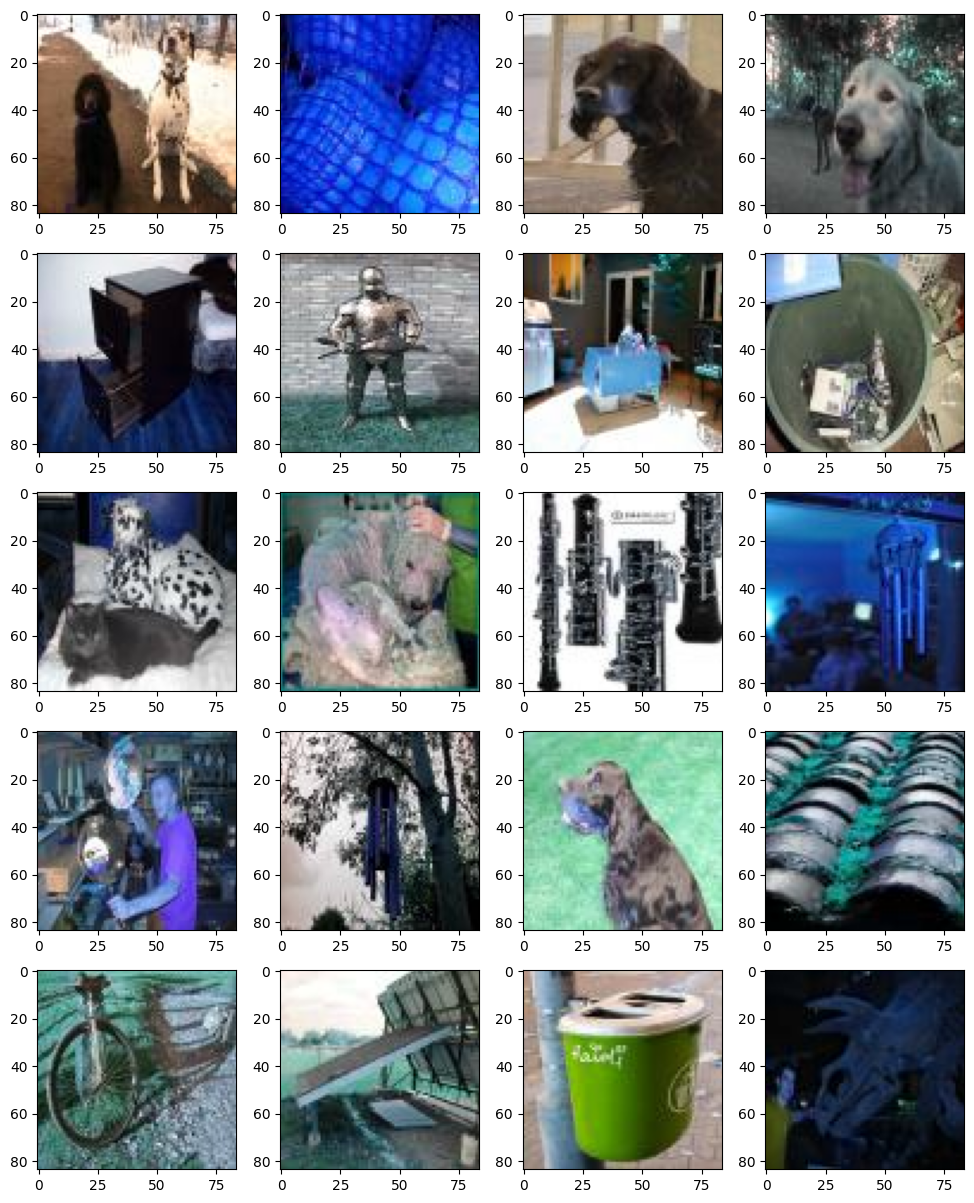

In [92]:
import random

randomImg = random.sample(img_pth, 20)
print(len(randomImg))

import cv2 
import PIL
from PIL import Image

%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 4
rows = 5

for i in range(0, columns*rows):
    image = cv2.imread(randomImg[i], cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()